# ***Bias correction of numerical prediction model temperature forecast Data Set ***

## **Abstract**

### **DATASET:**

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

Attribute Information:

For more information, read [Cho et al, 2020]. 
1. station - used weather station number: 1 to 25 
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30') 
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6 
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9 
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5 
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100 
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5 
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6 
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9 
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4 
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97 
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97 
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98 
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97 
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7 
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6 
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8 
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7 
19. lat - Latitude (Â°): 37.456 to 37.645 
20. lon - Longitude (Â°): 126.826 to 127.135 
21. DEM - Elevation (m): 12.4 to 212.3 
22. Slope - Slope (Â°): 0.1 to 5.2 
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9 
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9 
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8




# The aim of this dataset is used for predicting next day min and max temperatures.

In [ ]:
pip install Fitter

     |████████████████████████████████| 47 kB 2.1 MB/s 
  Created wheel for Fitter: filename=fitter-1.4.0-py3-none-any.whl size=25025 sha256=f8f47d4f336b7f18e16be33c21897a5f1ed6b53e752ee3766bcabaa344fd1e95
  Stored in directory: /root/.cache/pip/wheels/e1/98/16/e5263962f94fbfaad79902aa94652516caccc1f1d51509e853
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=4d78c7ec6753ac98e98b14f5f065e5d2f836ec5565faefff3590c77c2c4e5d2a
  Stored in directory: /root/.cache/pip/wheels/82/ab/83/fdfc4017ea44a585b6754752cc5f63f2d0d63fcc1317e7174b
Successfully built Fitter easydev


In [ ]:
import pandas as pd

import numpy as np
from pandas.plotting import table
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from fitter import Fitter, get_common_distributions, get_distributions

Before proceeding with the functions which have to be done we have to import the csv file from the UCI repository. Using Google collab we have two ways to import is, one being google drive authentication and other uploading in one of og your Github repositories and copying the raw link and importing it directly using the Pandas package.

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/Sairaghav1999/Dataset/main/Bias_correction_ucl.csv')

This is the dataset which we will be using for further processes

In [ ]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


Displaying the shape of the dataset to get an idea of the dimensions and if they are cross verified with the information given in the UCI repository

In [ ]:
df.shape

(7752, 25)

The datatypes of the features in our dataset

In [ ]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

Over here you can observe that the columns have float64 datatype except the dtype which is an object

In [ ]:
df.apply(lambda x: len(x.unique()))

station               26
Date                 311
Present_Tmax         168
Present_Tmin         156
LDAPS_RHmin         7673
LDAPS_RHmax         7665
LDAPS_Tmax_lapse    7676
LDAPS_Tmin_lapse    7676
LDAPS_WS            7676
LDAPS_LH            7676
LDAPS_CC1           7570
LDAPS_CC2           7583
LDAPS_CC3           7600
LDAPS_CC4           7525
LDAPS_PPT1          2813
LDAPS_PPT2          2511
LDAPS_PPT3          2357
LDAPS_PPT4          1919
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            184
Next_Tmin            158
dtype: int64

In [ ]:
df["Day"] = pd.to_datetime(df["Date"]).dt.day
df["Month"] = pd.to_datetime(df["Date"]).dt.month

In order to proceed with further analysis we make two columns Day,Month from the Date column and then we drop the date column

In [ ]:
df.drop('Date', axis = 1, inplace = True)

In [ ]:
df.describe()


,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000,7750.000000,7750.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,0.356080,0.318404,0.299191,0.591995,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220,15.983871,7.467742
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,0.258061,0.250362,0.254348,1.945768,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613,8.918647,0.530334
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000,1.000000,6.000000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,0.140615,0.101388,0.081532,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000,8.000000,7.000000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,0.312421,0.262555,0.227664,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000,16.000000,7.000000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,0.558694,0.496703,0.499489,0.052525,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000,24.000000,8.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000,31.000000,8.000000


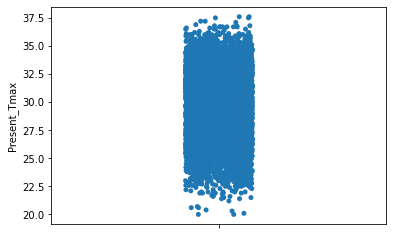

In [ ]:
df.Present_Tmax.describe()
sns.stripplot(y='Present_Tmax',data=df)

We can observe that the min value for Present_Tmax is 20 and checks out the condition of having a value which satisfies the natural conditions without any errors.

# Data cleaning and rectifying the missing values

In [ ]:
df.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Day                  2
Month                2
dtype: int64

It is evident that there are alot many missing values in the given dataset

In [ ]:
plt.figure(figsize = [20, 15])
sns.heatmap(df.isnull(), annot = True)                           
plt.title('Null Values')
plt.show()

KeyboardInterrupt: ignored

With the heatmap displayed over here it gives us a visual interpretation where the null values are. Lat,lon,DEM,slope seem to be empty as they have zero null values

In [ ]:
df.loc[df['Next_Tmax'].isnull()]

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month
831,7.0,29.6,25.8,76.202255,94.058517,28.842727,26.442801,7.980686,87.715882,0.442766,0.342353,0.333352,0.227664,0.086539,0.000000,0.000000,0.000000,37.5776,126.838,12.3700,0.0985,5357.705566,NaN,NaN,2.0,8.0
856,7.0,NaN,NaN,69.476059,93.672600,30.491629,25.081388,6.282423,124.191446,0.473034,0.322410,0.071169,0.173785,0.004247,0.000000,0.000000,0.000000,37.5776,126.838,12.3700,0.0985,5332.515625,NaN,NaN,3.0,8.0
1073,24.0,34.2,25.1,50.618851,89.166397,33.414349,27.475249,6.084058,48.521008,0.254070,0.152827,0.019523,0.013130,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.2223,5109.454102,NaN,NaN,11.0,8.0
2465,16.0,28.8,23.1,71.442566,90.695419,26.273760,23.419080,3.787889,41.739802,0.260468,0.641655,0.687770,0.751662,0.000000,0.010050,0.681801,0.000000,37.4697,126.995,82.2912,2.2579,5269.604980,NaN,NaN,5.0,8.0
3696,22.0,30.4,23.4,81.568771,93.973579,26.724457,24.984435,5.779299,58.456456,0.798225,0.739302,0.620072,0.659948,0.794114,0.711069,0.016985,0.064332,37.5102,127.086,21.9668,0.1332,5578.788086,NaN,NaN,23.0,7.0
3714,15.0,24.6,22.4,83.265244,94.153442,26.738321,24.585545,8.048991,43.391457,0.817756,0.666070,0.763967,0.583959,0.345704,0.803824,0.190226,0.001864,37.5507,126.937,30.0464,0.8552,5578.187500,NaN,NaN,24.0,7.0
3739,15.0,NaN,NaN,68.156593,93.874550,28.502294,24.270829,5.819343,35.236471,0.863410,0.689771,0.304014,0.064232,0.228036,1.128825,0.000000,0.000000,37.5507,126.937,30.0464,0.8552,5558.664551,NaN,NaN,25.0,7.0
3886,12.0,NaN,NaN,64.559479,86.083702,29.628166,25.745189,8.629767,26.564901,0.783111,0.781624,0.311202,0.235075,0.003733,0.020635,0.001050,0.000000,37.5507,126.988,132.1180,0.5931,5477.556152,NaN,NaN,31.0,7.0
4205,6.0,30.8,23.9,35.218002,82.458534,32.241880,23.018172,6.547084,63.516243,0.101724,0.068263,0.016206,0.036830,0.000000,0.000000,0.000000,0.000000,37.5102,127.042,54.6384,0.1457,5069.704102,NaN,NaN,13.0,8.0
4230,6.0,NaN,NaN,43.412582,84.317780,32.028639,24.274533,5.880758,54.278856,0.140189,0.076580,0.180294,0.130072,0.000000,0.000000,0.007733,0.000000,37.5102,127.042,54.6384,0.1457,5037.928223,NaN,NaN,14.0,8.0


In [ ]:
df.dropna(subset=['Next_Tmax', 'Next_Tmin'], inplace = True)

We take whichever rows are missing in our target variable columns

In [ ]:
df['Month'].fillna(df['Month'].mode()[0], inplace=True)
df['Day'].fillna(df['Day'].mode()[0], inplace=True)

We fill the missing values in the day and month column with mode values as it appears the most amongst the values

In [ ]:
df['Day'].unique()

array([30.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 31.])

Sklearn's simple imputer is used to take care of the other rows with the values missing

In [ ]:
my_imputer = SimpleImputer()
df_new = pd.DataFrame(my_imputer.fit_transform(df))

In [ ]:
df_new.columns = df.columns

In [ ]:
df_new.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Day                 0
Month               0
dtype: int64

We dont have any missing values anymore in the dataset

In [ ]:
df_new.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30.0,6.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30.0,6.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30.0,6.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30.0,6.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30.0,6.0


In [ ]:
df_new.shape

(7725, 26)

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f301fbad830> (for post_execute):


KeyboardInterrupt: ignored

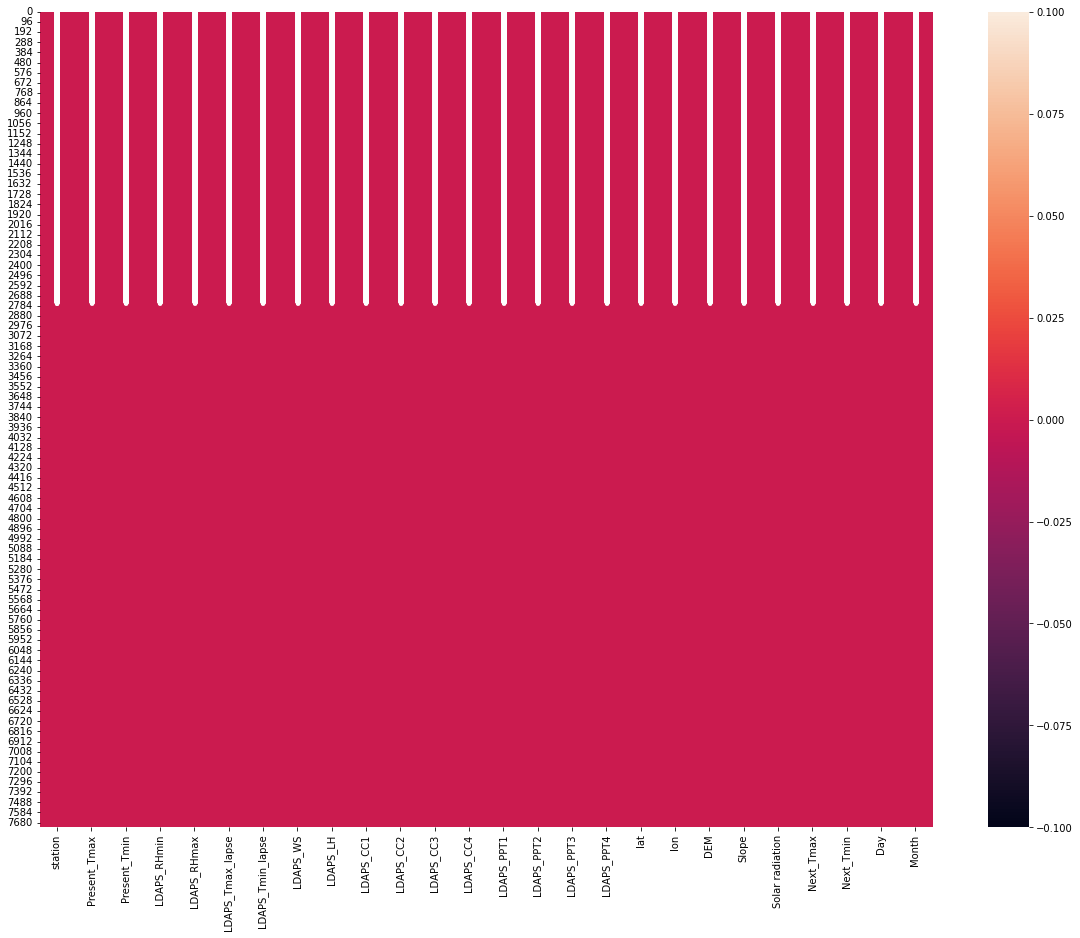

In [ ]:
plt.figure(figsize = [20, 15])
sns.heatmap(df_new.isnull(), annot = True)                           #Visual representation of no null values present in dataset
plt.title('Null Values')
plt.show()

From the graph it is evident now that there are no null values in the dataset

# **Data Visualisation**

In [ ]:
for i in df_new.columns:
  plt.rcParams["figure.figsize"] = [7.00, 3.50]
  plt.rcParams["figure.autolayout"] = True
  f, axes = plt.subplots(1, 2)
  sns.distplot(df_new[i],ax=axes[0])
  sns.boxplot(y = i, data = df_new , color='Green',ax=axes[1])
  sns.stripplot(y = i, data = df_new,color='Gray',ax=axes[1])

Present_Tmax, Present_Tmin, LDAPS_RHmin, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, Next_Tmax, Next_Tmin all have bell shaped curve graphs. But the other graphs have little skewness in them.

Can be observed there are outliers in the dataset


In [ ]:
for i in df_new.columns:                                         
    plt.figure(figsize = (15, 8))
    sns.regplot(df_new[i], df_new['Next_Tmax'])
    plt.title('Scatter Plot for Next Tmax vs other attributes')
    plt.xlabel(i)
    plt.ylabel('Next Maxi Temperature')
    plt.show()

In [ ]:
for i in df_new.columns:                                          
    plt.figure(figsize = (15, 8))
    sns.regplot(df_new[i], df_new['Next_Tmin'])
    plt.title('Scatter Plot for Next Tmin vs other attributes')
    plt.xlabel(i)
    plt.ylabel('Next Minimum Temperature')
    plt.show()

Majority of the graphs show that they are linearly related between the target variables and other columns

In [ ]:
plot_of_TempForecastMax=sns.distplot(df['Next_Tmax'])
plot_of_TempForecast=sns.distplot(df['Next_Tmin'], axlabel='Next Temperature')
fig = plot_of_TempForecastMax.get_figure()
fig = plot_of_TempForecast.get_figure()
fig.legend(labels=['Next Max Temperature','Next Min Temperature'])
fig.savefig("plot_of_tempMax.png")
fig.savefig("plot_of_temp.png")
plt.show()

## **Splitting into training and test dataset**

In [ ]:
x = df_new.drop(['Next_Tmax', 'Next_Tmin'], axis = 1)
y = df_new.drop(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Day', 'Month'], axis = 1)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state = 465)

NameError: ignored

In [ ]:
print('Train',x_train.shape,y_train.shape)
print('Test',x_test.shape,y_test.shape)

We can observe that the dataset is split evenly into train and test datasets

In [ ]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)

sns.boxplot(data=y_train,ax=axes[0]).set(title='Next_Tmax y_train')
sns.boxplot(data=y_test,ax=axes[1]).set(title='Next_Tmin y_test')

You can observe that they are split equally accordingly 

# **Feature Selection**


### **Correlation Matrix**

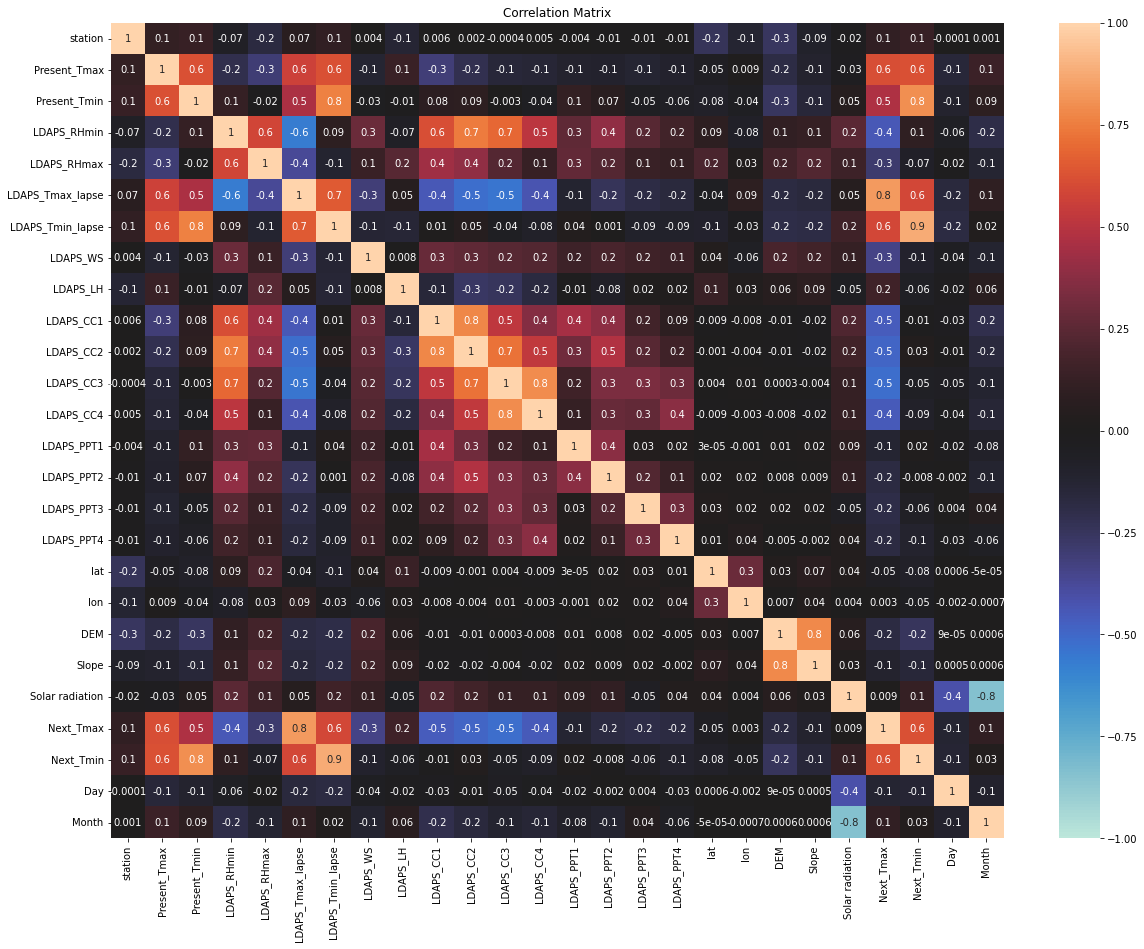

In [ ]:
plt.figure(figsize = [20, 15])                             
sns.heatmap(df_new.corr(), annot = True,vmin=-1, vmax=1, center= 0,fmt='.1g')
plt.title('Correlation Matrix')
plt.show()

We can deduce few observations from this heatmap
1. Both target variables are highly correlated with each other
2. We see the other independent variables being correlated with our target variables highly


In [ ]:
cor=df_new.corr()
cor_target = abs(cor['Next_Tmax'])
relevant_features = cor_target[cor_target>0.4]
relevant_features


In [ ]:
cor=df_new.corr()
cor_target = abs(cor['Next_Tmin'])
relevant_features = cor_target[cor_target>0.4]
relevant_features

We see good correlation values in relation with the heatmap so we can stop at this feature selection

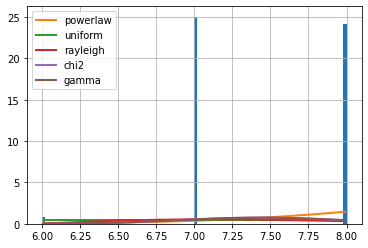

In [ ]:
for i in df_new.columns:
  f = Fitter(df_new[i],
           distributions= get_common_distributions())
  f.fit()
  f.summary()
  f.get_best(method='sumsquare_error')

### * Which independent variables are useful to predict a target (dependent variable)?

We have two target variables **Next_Tmax** and **Next_Tmin **. For both of them we have concluded that the useful variables are Present_Tmax, Present_Tmin, LDAPS_RHmin, LDAPS_RHmax,LDAPS_Tmax_lapse, LDAPS_Tmin_lapse

### * Which independent variable have missing data? How much? 



1.   Present_Tmax        70
2.   Present_Tmin        70
3.   LDAPS_RHmin         75
4.   LDAPS_RHmax         75
5.   LDAPS_Tmax_lapse    75
6.   LDAPS_Tmin_lapse    75


### * Do the training and test sets have the same data?
The training and test data was split using a randomized train_test_split function from the sklearn library, into a sample size of 80% for training dataset and 20% for test dataset. Furthermore, we plotted box and whisker plots to determine that the both the train and test datasets were a good sample representation of the whole dataset and had similar ranges of target values.

### * In the predictor variables independent of all the other predictor variables?
No, referring to the correlation matrix we can depict that you can observe multicollinearity between each other. 

### * Which predictor variables are the most important?

Present_Tmax, Present_Tmin, LDAPS_RHmin, LDAPS_RHmax,LDAPS_Tmax_lapse, LDAPS_Tmin_lapse

### * Do the ranges of the predictor variables make sense?

Yes. The ranges of the predictor variables make sense, can observe from the ranges that the temperatures for maximum and minimum lie well within the range

### * What are the distributions of the predictor variables?
We have two predictor variables that are normally distributed, however the others are not normally distributed. For optimal performance of our choice of machine learning algorithm, we may have to normalize the dataset's important features.

# **Citations**

1)Cho, D., Yoo, C., Im, J., & Cha, D. (2020). Comparative assessment of various machine learning-based bias correction methods for numerical weather prediction model forecasts of extreme air temperatures in urban areas. Earth and Space Science.

2)https://colab.research.google.com/drive/1LYlc6NP-noZoTOGAAHf2muGbkuG2wN3c?usp=sharing

3)https://colab.research.google.com/drive/1aqXMghBkL5x5zzbvN6o8p8r3bGKLbzJk?usp=sharing

4)https://www.tutorialspoint.com/python-pandas-filling-missing-column-values-with-mode

5)https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

6)https://github.com/nikbearbrown

7)https://stackoverflow.com/

# **License**

### **Copyright 2021 Sai Raghavendra Viravalli**

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.